GOPAL RAI (ROLL NO- 21103040)

Problem 1: Kinematic Wave Routing

Write two computer programs for kinematic wave routing using (a) Linear Method; (b) NonLinear Method. Each program needs to have the following features:
• Ask the user for channel cross-section with two options to choose from: a) 
Rectangular section; b) Trapezoidal section
• If rectangular section is chosen, ask to input the bottom width (in m).
• If trapezoidal section is chosen, ask to input the bottom width (in m) and side slope
(in degrees with vertical).
• Ask the user to input the longitudinal slope of the channel (dimensionless)
• Ask the user to input the length (L) of the channel (in m) for which the simulation has 
to be done 
• Ask the user to input the values of Dx and Dt. (you may set some default values for 
this)
• Upstream boundary condition: user input hydrograph. (For intermediate times that 
may be required for the specified Dt, you may use linear interpolation)
• Use a uniform flow as the initial condition with a user specified discharge.

Enter the type of 'method': 
For Linear Method press 0 
For Non-linear Method press 1 : 0
Enter the type of 'channel': 
For Rectangular channel press 0 
For Trapezoidal channnel press 1 :0
Enter the Bottom width in meter90
Enter the longitudinal slope of the channel:0.015
Enter the  length of the channel:5000
Enter the  value of delta x:100
Enter the  value of delta t:1
Enter the time interval for the hydrograph:20
Please enter the number of unit hydrograph ordinates you want to enter :9
Enter the UH 1 ordinate:14.2
Enter the UH 2 ordinate:39.7
Enter the UH 3 ordinate:263
Enter the UH 4 ordinate:327.8
Enter the UH 5 ordinate:292.6
Enter the UH 6 ordinate:154.6
Enter the UH 7 ordinate:70.7
Enter the UH 8 ordinate:23.4
Enter the UH 9 ordinate:16.1
The distance should be Only multiple of 100.0 meter
Enter the distance at which you want the flow hydrograph in meters :5000


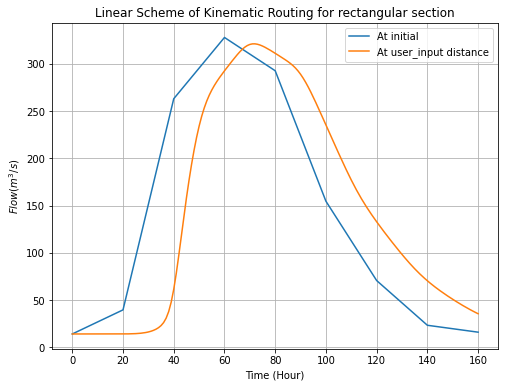

In [ ]:
import math
#Linear Method
for method in range(0,100):
  method=0
  while method!=0 or method!=1: #for asking the user to make a choice between linear or no-linear method
    method=int(input("Enter the type of 'method': \nFor Linear Method press 0 \nFor Non-linear Method press 1 :"))
    if method==0:
      for channel in range(0,100):
        channel=0
        while channel!=0 or channel!=1: #for asking the user to make a choice between rectangular and trapezoidal channel
          channel=int(input("Enter the type of 'channel': \nFor Rectangular channel press 0 \nFor Trapezoidal channnel press 1 :"))
          if channel==0:
           

            import numpy as np
            import matplotlib.pyplot as plt
            B=float(input("Enter the Bottom width in meter"))
            S = float(input("Enter the longitudinal slope of the channel:"))
            n = 0.02
            L = float(input("Enter the  length of the channel:"))
            delta_x = float(input("Enter the  value of delta x:"))
            delta_t = float(input("Enter the  value of delta t:"))          
            interval = float(input("Enter the time interval for the hydrograph:"))
            t = int(input("Please enter the number of unit hydrograph ordinates you want to enter :"))
            import numpy as np           
            T=np.arange(0,t*interval,interval)
            U2=[]
            for u in range(t):
              U1=float(input("Enter the UH %d ordinate:"%(u+1),))
              U2.append(U1)
            U=np.array(U2)
            #interpolating the input flow UH for all delta_t interval
            from scipy.interpolate import interp1d
            if delta_t != interval :
              interploation_model = interp1d(T, U)
              T = np.arange(0,T[-1]+delta_t,delta_t)
              U = interploation_model(T)

            
            def Depth_rect(B,S,n,Q):
              from scipy.optimize import newton
              def mannings_eq(y,n=n,Q=Q,So=S,b=B):
                return (((n*Q)/(b*y*So**0.5))**1.5)-((b*y)/(b+2*y))
              sol = newton(mannings_eq,0.01)
              return sol
            
            def alpha1(B,S,n,Q):
              y = Depth_rect(B,S,n,Q)
              P = y*2+B
              return ((n*(P**(2/3)))/(S**0.5))**(3/5)
            beta = 3/5
            dtdx = (delta_t/delta_x)*60 #converting to seconds
            Q = [U[0]]
            #First calculation at first Δx 
            from scipy import optimize
            for i in range(1,len(T)):
                alpha = alpha1(B,S,n,U[i-1])
                Q_new = ((dtdx*U[i]) + (Q[i-1]*alpha*beta*((Q[i-1]+U[i])/2)**(beta-1)))/((dtdx)+(alpha*beta*((Q[i-1]+U[i])/2)**(beta-1))) 
                Q.append(Q_new)
            #Now Q has the value of discharge at first Δx interval for all Δt interval

            l = np.arange(0,L+delta_x,delta_x) #interpolating the length to mini Δx's 
            Q_T = np.zeros((len(l),len(U))) #Creating an empty 2-D array to store all the values for Discharge calculated at all Δx and all Δt   
            Q_T[0][:] = Q #puting the discharges at first Δx interval for all Δt interval in the first row

            for k in range(0,len(l)):
              Q_T[k][0] = U[0]  #Setting the first element of all the rows equal to the the first element of the entered UH, as specified in the boundary condition of uniform flow
            for i in range(0,len(l)-1): #i is index for space i.e) i = 1 is 1st Δx
              Q = []
              for j in range(0,len(T)): #this loop calculates all the Discharges for a given Δx
                if j<len(T)-1:
                  alpha = alpha1(B,S,n,Q_T[i][j]) #finding alpha using previous discharge
                  Q_T[i+1][j+1] = (((dtdx)*Q_T[i][j+1]) + (Q_T[i+1][j]*alpha*beta*((Q_T[i+1][j]+Q_T[i][j+1])/2)**(beta-1)))/((dtdx)+(alpha*beta*((Q_T[i+1][j]+Q_T[i][j+1])/2)**(beta-1)))
                  Q.append(Q_T[i+1][j+1]) #appends all the discharges at varying Δts for particular i
                Q.append(Q_T[i+1]) #this appends the array containig all Discharges for a given Δx

            print("The distance should be Only multiple of",delta_x,"meter")
            dist= int(input("Enter the distance at which you want the flow hydrograph in meters :"))
            e = int(dist/delta_x)
            plt.figure(figsize=(8,6))
            plt.plot(T,U,label = 'At initial')
            plt.xlabel('Time (Hour)')
            plt.ylabel('$Flow (m^3/s)$')
            plt.title("Linear Scheme of Kinematic Routing for rectangular section")
            plt.plot(T,Q_T[e][:],label = 'At user_input distance')
            plt.grid()
            plt.legend()

            break
          elif channel==1:
            import numpy as np
            import matplotlib.pyplot as plt
            B=float(input("Enter the Bottom width in meter"))
            Slope=float(input("Enter the value of Slope in degree"))
            S = float(input("Enter the longitudinal slope of the channel (dimensionless) :"))
            n = 0.02
            L = float(input("Enter the  length (L) of the channel (in m) for which the simulation has to be done :"))
            delta_x = float(input("Enter the  desired length interval Δx (in meter):"))
            delta_t = float(input("Enter the  desired time interval Δt (in minutes):"))

            
            interval = float(input("Enter the time interval for the hydrograph (in minutes) :"))
            t = int(input("Please enter the number of unit hydrograph ordinates you want to enter :"))
            import numpy as np
            
            T=np.arange(0,t*interval,interval)
            U2=[]
            for u in range(t):
              U1=float(input("Enter the UH %d ordinate:"%(u+1),))
              U2.append(U1)
            U=np.array(U2)
           
            #interpolating the input flow UH for all Δt interval
            from scipy.interpolate import interp1d
            if delta_t != interval :
              interploation_model = interp1d(T, U, kind = "linear")
              T = np.arange(0,T[-1]+delta_t,delta_t)
              U = interploation_model(T)
            m=math.tan(Slope)
            #Function for calculating normal depth of rectangular channel
            def Depth_trap(B,S,n,Q,m):
              from scipy.optimize import newton
              def mannings_eq(y,n=n,Q = Q,So = S,b=B,m = m):
                return ((n*Q/(So**.5*(b+(m*y))*(y)))**1.5)-(((b+m*y)*y)/((b+(2*y*(1+m**2)**.5))))
              sol = newton(mannings_eq,0.01)
              return sol
            
            def alpha1(B,S,n,Slope,Q):
              y = Depth_trap(B,S,n,Q,m)
              P = (B+2*y*(1+m**2)**(1/2))
              return ((n*(P**(2/3)))/(S**0.5))**(3/5)

            
            beta = 3/5
            dtdx = (delta_t/delta_x)*60 #converting to seconds
            Q = [U[0]]
            #First calculation at first Δx 
            from scipy import optimize
            for i in range(1,len(T)):
              alpha = alpha1(B,S,n,Slope,U[i-1])
              Q_new = ((dtdx*U[i]) + (Q[i-1]*alpha*beta*((Q[i-1]+U[i])/2)**(beta-1)))/((dtdx)+(alpha*beta*((Q[i-1]+U[i])/2)**(beta-1))) 
              Q.append(Q_new)
            #Now Q has the value of discharge at first Δx interval for all Δt interval

            l = np.arange(0,L+delta_x,delta_x) #interpolating the length to mini Δx's 
            Q_T = np.zeros((len(l),len(U))) #Creating an empty 2-D array to store all the values for Discharge calculated at all Δx and all Δt   
            Q_T[0][:] = Q #puting the discharges at first Δx interval for all Δt interval in the first row

            for k in range(0,len(l)):
              Q_T[k][0] = U[0]  #Setting the first element of all the rows equal to the the first element of the entered UH, as specified in the boundary condition of uniform flow
            for i in range(0,len(l)-1): #i is index for space i.e) i = 1 is 1st Δx
              Q = []
              for j in range(0,len(T)): #this loop calculates all the Discharges for a given Δx
                if j<len(T)-1:
                  alpha = alpha1(B,S,n,Slope,Q_T[i][j]) #finding alpha using previous discharge
                  Q_T[i+1][j+1] = (((dtdx)*Q_T[i][j+1]) + (Q_T[i+1][j]*alpha*beta*((Q_T[i+1][j]+Q_T[i][j+1])/2)**(beta-1)))/((dtdx)+(alpha*beta*((Q_T[i+1][j]+Q_T[i][j+1])/2)**(beta-1)))
                  Q.append(Q_T[i+1][j+1]) #appends all the discharges at varying Δts for particular i
                Q.append(Q_T[i+1],Q) #this appends the array containig all Discharges for a given Δx

            
            print("\nNote: Only multiple of",delta_x,"meter allowed :")
            dist = int(input("Enter the distance at which you want the flow hydrograph in meters :"))
            e = int(dist/delta_x)
            plt.figure(figsize=(8,6))
            plt.plot(T,U,label = 'At initial')
            plt.xlabel('Time (Hour)')
            plt.ylabel('$Flow (m^3/s)$')
            plt.title("Linear Scheme of Kinematic Routing for rectangular section")
            plt.plot(T,Q_T[e][:],label = 'At user_input distance')
            plt.grid()
            plt.legend()
            
            break
          else:
            print('You have given a wrong input')
        break
      break
    elif method==1: #Non-Linear Method
      for channel in range(0,100):
        channel=0
        while channel!=0 or channel!=1:
          channel=int(input("Enter the type of 'channel': \nFor Rectangular channel press 0 \nFor Trapezoidal channnel press 1 :"))
          if channel==0:
            import numpy as np
            import matplotlib.pyplot as plt
            B=float(input("Enter the Bottom width in meter"))
            
            S = float(input("Enter the longitudinal slope of the channel (dimensionless) :"))
            n = 0.02
            L = float(input("Enter the  length (L) of the channel (in m) for which the simulation has to be done :"))
            delta_x = float(input("Enter the  desired length interval Δx (in meter):"))
            delta_t = float(input("Enter the  desired time interval Δt (in minutes):"))         
            interval = float(input("Enter the time interval for the hydrograph (in minutes) :"))
            t = int(input("Please enter the number of unit hydrograph ordinates you want to enter :"))
            import numpy as np           
            #for a given data
            
            T=np.arange(0,t*interval,interval)
            U2=[]
            for u in range(t):
              U1=float(input("Enter the UH %d ordinate:"%(u+1),))
              U2.append(U1)
            U=np.array(U2)
            #interpolating the input flow UH for all Δt interval
            from scipy.interpolate import interp1d
            if delta_t != interval :
              interploation_model = interp1d(T, U, kind = "linear")
              T = np.arange(0,T[-1]+delta_t,delta_t)
              U = interploation_model(T)

            #Function for calculating normal depth of rectangular channel
            def Depth_rect(B,S,n,Q):
              from scipy.optimize import newton
              def mannings_eq(y,n=n,Q=Q,So=S,b=B):
                return (((n*Q)/(b*y*So**0.5))**1.5)-((b*y)/(b+2*y))
              sol = newton(mannings_eq,0.01)
              return sol
            #Getting alpha
            def alpha1(B,S,n,Q):
              y = Depth_rect(B,S,n,Q)
              P = y*2+B
              return ((n*(P**(2/3)))/(S**0.5))**(3/5)
            beta = 3/5
            dtdx = (delta_t/delta_x)*60 #converting to seconds
            Q = [U[0]]

            def k_value(dtdx,alpha,Q1,Q2,beta):
              return (dtdx*Q1)+(alpha*Q2**(beta))

            #First calculation at first Δx 
            from scipy import optimize
            for i in range(1,len(T)):
              alpha = alpha1(B,S,n,U[i-1])
              K = k_value(dtdx,alpha,U[i],U[i-1],beta)
              def func(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta):
                return (dtdx*Q)+(alpha*Q**(beta))-K
              def func1(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta):
                return dtdx + (alpha*beta*(Q)**(beta-1))
              Q_new = optimize.newton(func,1,fprime = func1)
              Q.append(Q_new)
            #Now Q has the value of discharge at first Δx interval for all Δt interval

            l = np.arange(0,L+delta_x,delta_x) #interpolating the length to mini Δx's 
            Q_T = np.zeros((len(l),len(U))) #Creating an empty 2-D array to store all the values for Discharge calculated at all Δx and all Δt   
            Q_T[0][:] = Q
            for k in range(0,len(l)):
              Q_T[k][0] = U[0]  #Setting the first element of all the rows equal to the the first element of the entered UH, as specified in the boundary condition of uniform flow
            for i in range(0,len(l)-1): #i is index for space i.e) i = 1 is 1st Δx
              Q = []
              for j in range(0,len(T)): #this loop calculates all the Discharges for a given Δx
                if j<len(T)-1:
                  alpha = alpha1(B,S,n,Q_T[i][j])
                  K = k_value(dtdx,alpha,Q_T[i][j+1],Q_T[i+1][j],beta)
                  def func(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta): #f
                    return (dtdx*Q)+(alpha*Q**(beta))-K
                  def func1(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta): #fprime
                    return dtdx + (alpha*beta*(Q)**(beta-1))
                  Q_T[i+1][j+1] = optimize.newton(func,1,fprime = func1) #NewtonRaphson
                  Q.append(Q_T[i+1][j+1]) #appends all the discharges at varying Δts for particular i
                Q.append(Q_T[i+1]) #this appends the array containig all Discharges for a given Δx

            #Function to plot UH at any Δx and provides comparision with initial condition
            
            print("\nNote: Only multiple of",delta_x,"meter allowed :")
            x = int(input("Enter the distance at which you want the flow hydrograph in meters :"))
            e = int(x/delta_x)
            plt.figure(figsize=(8,6))
            plt.plot(T,U,label = 'At initial')
            plt.xlabel('Time (Hour)')
            plt.ylabel('$Flow (m^3/s)$')
            plt.title("Non-Linear Scheme of Kinematic Routing for rectangular section")
            plt.plot(T,Q_T[e][:],label = 'At user_input distance')
            plt.grid()
            plt.legend()           
            break       
          elif channel==1:
            import numpy as np
            import matplotlib.pyplot as plt
            B=float(input("Enter the Bottom width in meter"))
            Slope=float(input("Enter the Slope in degree"))
            S = float(input("Enter the longitudinal slope of the channel (dimensionless) :"))
            n = 0.02
            L = float(input("Enter the  length (L) of the channel (in m) for which the simulation has to be done :"))
            delta_x = float(input("Enter the  desired length interval Δx (in meter):"))
            delta_t = float(input("Enter the  desired time interval Δt (in minutes):"))
          
            
            interval = float(input("Enter the time interval for the hydrograph (in minutes) :"))
            t = int(input("Please enter the number of unit hydrograph ordinates you want to enter :"))
            import numpy as np
            
            #for a given data
            n= 0.02
            T=np.arange(0,t*interval,interval)
            U2=[]
            for u in range(t):
              U1=float(input("Enter the UH %d ordinate:"%(u+1),))
              U2.append(U1)
            U=np.array(U2)
           
            #interpolating the input flow UH for all Δt interval
            from scipy.interpolate import interp1d
            if delta_t != interval:
              interploation_model = interp1d(T, U, kind = "linear")
              T = np.arange(0,T[-1]+delta_t,delta_t)
              U = interploation_model(T)
            m=math.tan(Slope)
            #Function for calculating normal depth of rectangular channel
            def Depth_trap(B,S,n,Q,m):
              from scipy.optimize import newton
              def mannings_eq(y,n=n,Q = Q,So = S,b=B,m = m):
                return ((n*Q/(So**.5*(b+(m*y))*(y)))**1.5)-(((b+m*y)*y)/((b+(2*y*(1+m**2)**.5))))
              sol = newton(mannings_eq,0.01)
              return sol
            #Function for calculating normal depth for a given Q using above two functions according to the entered type of channel
             #Getting alpha
            def alpha1(B,S,n,Slope,Q):
              y = Depth_trap(B,S,n,Q,m)
              P = (B+2*y*(1+m**2)**(1/2))
              return ((n*(P**(2/3)))/(S**0.5))**(3/5)

            
            beta = 3/5
            dtdx = (delta_t/delta_x)*60 #converting to seconds
            Q = [U[0]]

            def k_value(dtdx,alpha,Q1,Q2,beta):
              return (dtdx*Q1)+(alpha*Q2**(beta))
            from scipy.optimize import newton
            for i in range(1,len(T)):
              alpha = alpha1(B,S,n,Slope,U[i-1])
              K = k_value(dtdx,alpha,U[i],U[i-1],beta)
              def func(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta):
                return (dtdx*Q)+(alpha*Q**(beta))-K
              def func1(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta):
                return dtdx + (alpha*beta*(Q)**(beta-1))
              Q_new = optimize.newton(func,1,fprime = func1)
              Q.append(Q_new)
               
            l = np.arange(0,L+delta_x,delta_x) #interpolating the length to mini Δx's 
            Q_T = np.zeros((len(l),len(U))) #Creating an empty 2-D array to store all the values for Discharge calculated at all Δx and all Δt   
            Q_T[0][:] = Q #puting the discharges at first Δx interval for all Δt interval in the first row

            for k in range(0,len(l)):
              Q_T[k][0] = U[0]  #Setting the first element of all the rows equal to the the first element of the entered UH, as specified in the boundary condition of uniform flow
            for i in range(0,len(l)-1): #i is index for space i.e) i = 1 is 1st Δx
              Q = []
              for j in range(0,len(T)): #this loop calculates all the Discharges for a given Δx
                if j<len(T)-1:
                  alpha = alpha1(B,S,n,Slope,Q_T[i][j])
                  K = k_value(dtdx,alpha,Q_T[i][j+1],Q_T[i+1][j],beta)
                  def func(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta): #function
                    return (dtdx*Q)+(alpha*Q**(beta))-K
                  def fun1(Q,dtdx=dtdx,alpha=alpha,K=K,beta=beta): #derivative
                    return dtdx + (alpha*beta*(Q)**(beta-1))
                  Q_T[i+1][j+1] = newton(func,1,fprime = fun1) #NewtonRaphson
                  Q.append(Q_T[i+1][j+1]) #appends all the discharges at varying Δts for particular i
                Q.append(Q_T[i+1])
            print("\nNote: Only multiple of",delta_x,"meter allowed :")
            x = int(input("Enter the distance at which you want the flow hydrograph in meters :"))
            e = int(x/delta_x)
            plt.figure(figsize=(8,6))
            plt.plot(T,U,label = 'At initial')
            plt.xlabel('Time (Hour)')
            plt.ylabel('$Flow (m^3/s)$')
            plt.title("Non-Linear Scheme of Kinematic Routing for rectangular section")
            plt.plot(T,Q_T[e][:],label = 'At user_input distance')
            plt.grid()
            plt.legend()
            break
          else:
            print('You have given a wrong input')
            break
        break
      break
    else:
      print('You have given a wrong input')
      break
    break
  break